# Seaborn Review

Seaborn is a really great package for quickly producing nice plots. It's basic structure looks like this

![seaborn anatomy](images/seabornOverview.png)

The top row (the larger boxes) are figure-level plots. The handle much of the busywork of making a nice figure for you, and also allow you to select which underlying plot type to use (e.g. lineplot vs scatterplot).


There are also a couple functions, `pairplot()` and `jointplot()` that produce some common figures using a mix of plot types. We've made examples of both of these "by hand" already in this course.

Seaborn is built on top of matplotlib so, ultimately, everything in a seaborn figure is an `axes` or other matplotlib `artist`. This means that you can always use matplotlib methods if you need to do some low level customization of your figures.

## Preliminaries

First, let's import what we'll need:

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
# I had to do this for some reason

## Figure level plots

 We'll start with some figure level plots.

### Relational plots

Several example data sets come with seaborn. Here's one about tipping:

In [2]:
tips = sns.load_dataset("tips")

Let's peek at the data set after loading (always!):

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


---

`describe` the numerical data in `tips`:

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Based on this summary of the numerical data in `tips`, do you think this is a recent US data set?

Count the number of smokers in `tips`.

In [5]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

Does this confirm or refute your guess made on the numerical data?

---

#### scatter plots

Let's make a call to `relplot`:

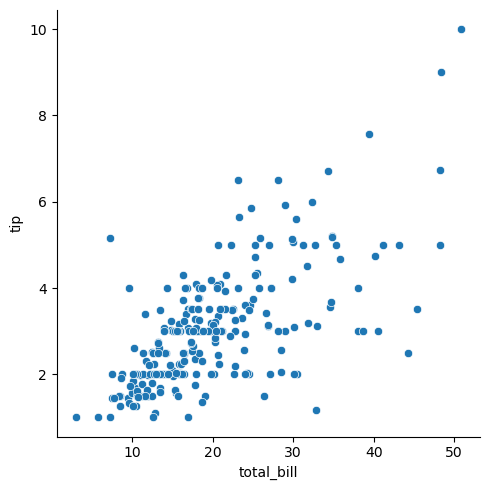

In [21]:
sns.relplot(data=tips, x="total_bill", y="tip")

We can see that the vast majority of tips fall below a 20% line, it probably is an old data set (assuming its from the US).

In terms of the plot *per se* though... so far, not a huge jump up from `matplotlib` 

Seaborn has five built in themes: darkgrid (the default), whitegrid, dark, white, and ticks. Let's set the default theme and replot.

In [23]:
sns.set_theme()

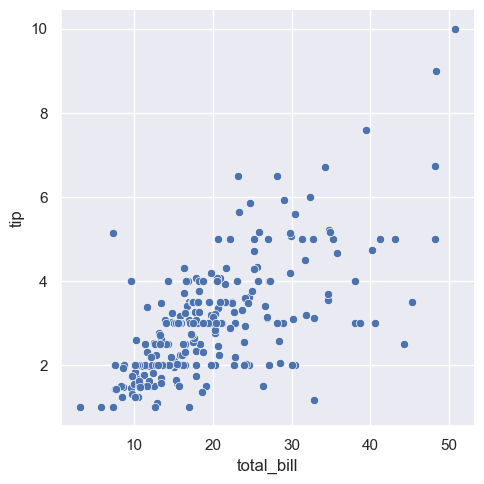

In [24]:
sns.relplot(data=tips, x="total_bill", y="tip")

That's better, and not unlike ggplot2's default theme in R.

But now, let's look at how easy it is to make a fancy plot by assigning other variables to plot aesthetic properties.

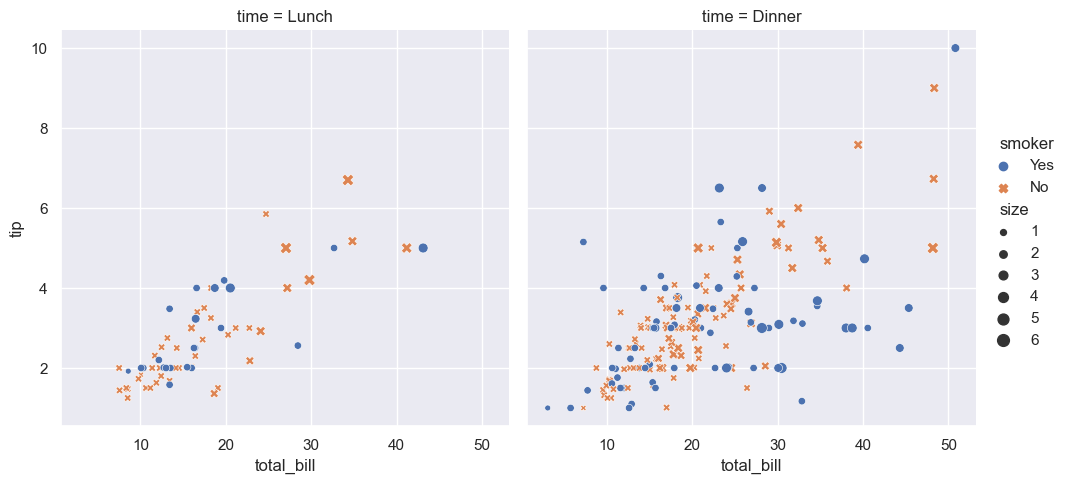

In [25]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

Now that's a lot of plot for very little effort!

#### scatter plot with regression

Let's look at the tipping rate for females vs. males.

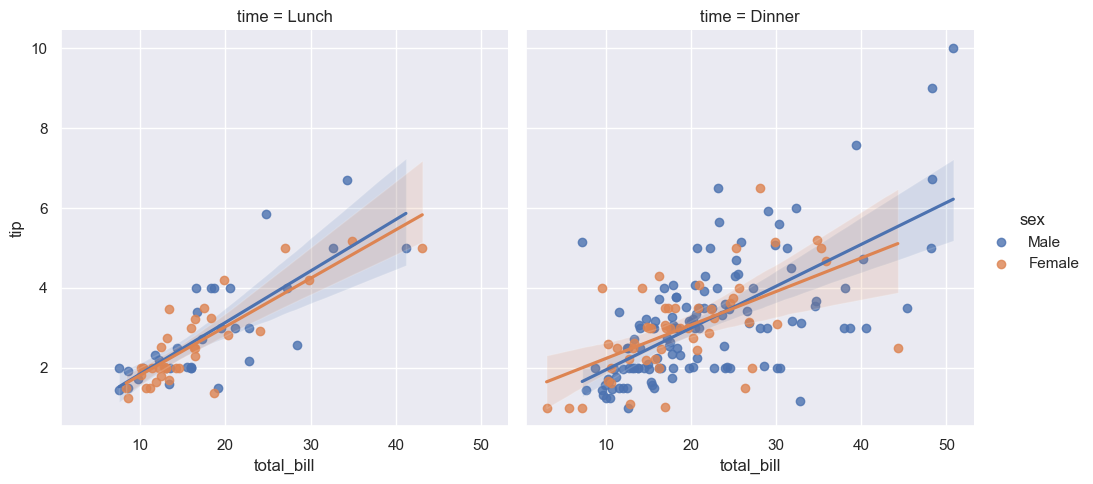

In [35]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="sex")

Those look identical. But let's do take a moment at what seaborn has done under the hood for us here. It has:

- run a linear regression on tip vs. bill separately for each group that we defined with our column and color specification
- plotted the regression lines
- computed 95% CIs on the fits, and plotted those as shaded areas.

Impressive. For those of you coming from R/tidyverse land, this is probably reminding you of ggplot(), above and beyond the appearance of the background.

You might be wondering where we got `lmplot()`, as it's not one of the plots listed in the seaborn diagram above. Seaborn does have some "hidden gems" like `lmplot()` and `jointplot()` that you'll only discover by looking at the seaborn documentation.

Pro tip: There are two *really* useful places in the seaborn documentation to look for stuff:

- the [function interface reference](https://seaborn.pydata.org/api.html#function-interface)
- the [gallery](https://seaborn.pydata.org/examples/index.html)

In the [gallery](https://seaborn.pydata.org/examples/index.html), you can browse plot types by appearance; the mouse-over text will tell you the function used to make the plot, and clicking on the plot will take you to the example code! 

Now let's look at the tipping rate for smokers vs. non-smokers.

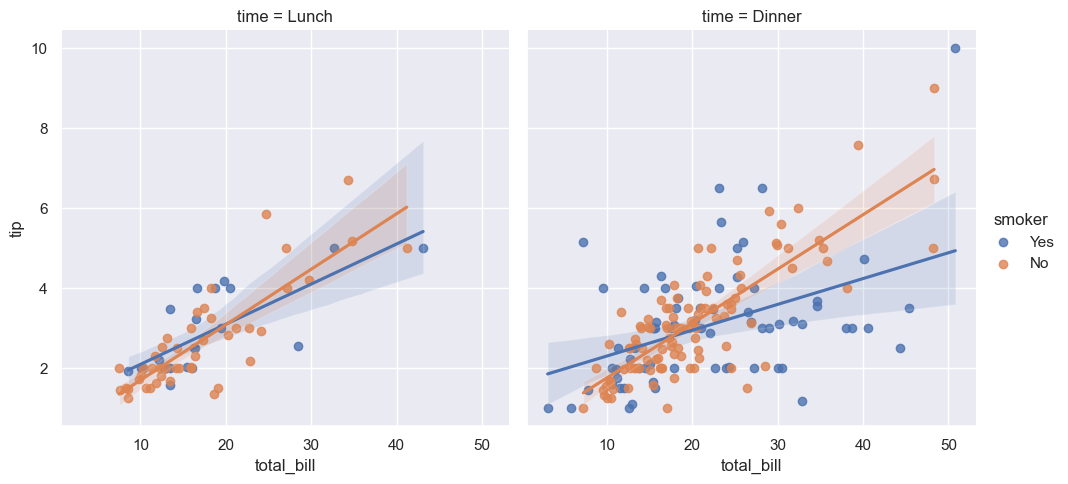

In [41]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

Hm. Looks like at dinner, smokers may tip less (although the uncertainty on the fits is too high to be sure).

#### line plots

Scatter plots are usefully for pairwise data in which the pairs themselves are independent of one another. 

In other cases, the data are ordered by the x the x values. Often this is due to the y value unfolding over time. 

Let's load another data set to look at this.

In [37]:
dots = sns.load_dataset("dots")

In [38]:
# take a peek as always


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


The main data here are the firing rate of a neuron in the superior colliculus (a brain area crucial for moving the eyes) as a function of time. In the experiment, moving stimuli of various strengths ('coherence') appear on the screen, and the subject has to decide which way they moved (left or right, say). Later, the stimuli disappear and are replaced by two targets. The subject has to indicate their choice by moving their eyes to the appropriate target (left or right). Sometimes, the target corresponding to the subject's choice was within the neurons "area of responsibility" in the visual field (`choice` = `T1`), and sometimes without (`choice` = `T2`)

The neural recordings can either be aligned in time to the moment the stimuli appeared (`align` = `dots`) or to the precise moment the eye movement (a saccade) began (`align` = `sacc`)

Let's plot!

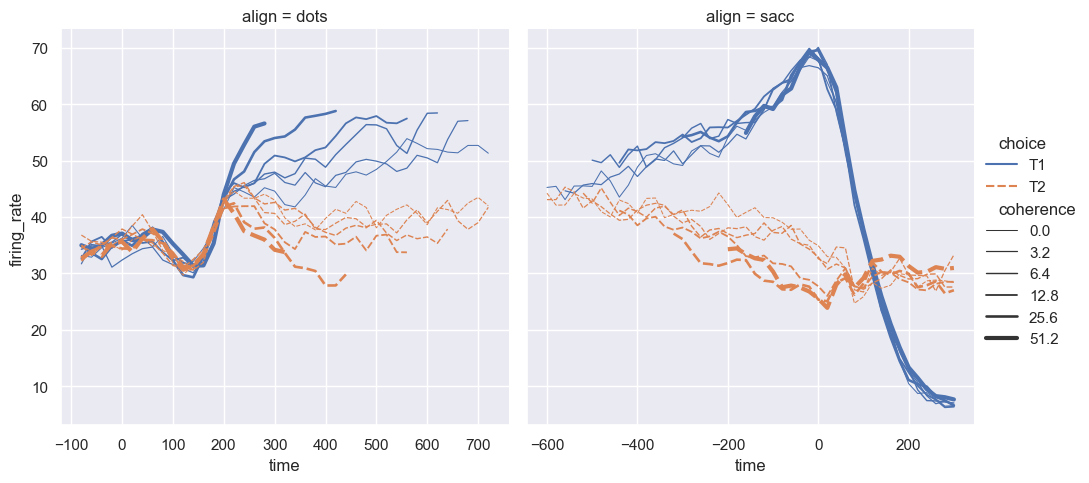

In [42]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

Even if we knew nothing about the experiment, we could see that there is cool stuff going on. The plot makes it very clear that there is a huge effect of choice (eye movement direction), there is differential build-up of activity starting about 200 msec after the stimulus comes on, and that this neuron is almost certain involved in driving the eye movement in the T1 direction.

That's a lot of plot for very little effort. Notice that we didn't even have to remember to use different arguments for `size` and `style` when we switched from scatter to line plots – we used the same arguments and seaborn interpreted them as "line size" or "marker size", etc., as appropriate.

Change the plot so that color codes stimulus strength and size codes choice.

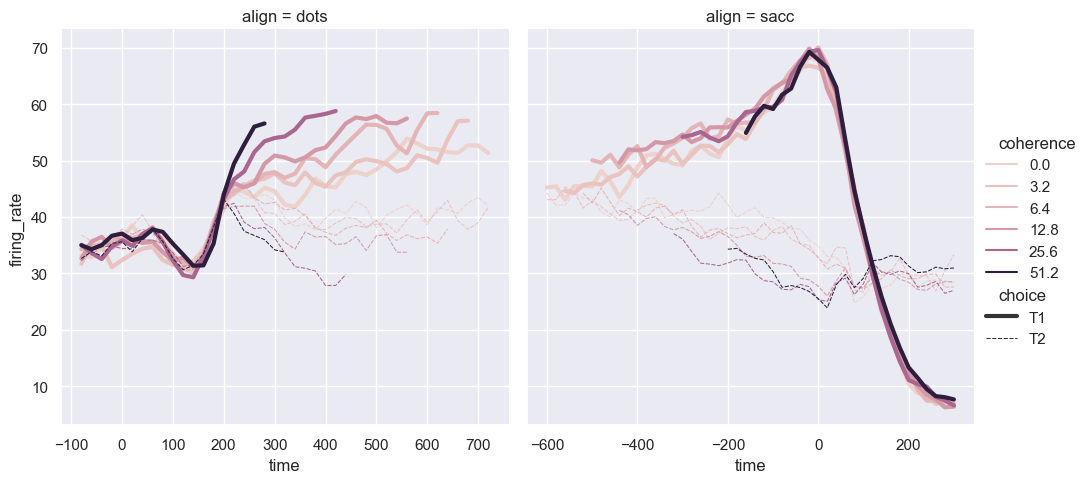

In [43]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="coherence", size="choice", style="choice",
    facet_kws=dict(sharex=False),
)

Whether that made the plot better or worse is debatable, but the point is that we could so easily change it and see!

#### Automagic uncertainties (graphical stats)

In [45]:
fmri = sns.load_dataset("fmri")

In [46]:
# peek at the data
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


So we have a fairly large data set consisting of 5 variables. It looks like we have a an fMRI signal (that's 1 variable) that was recorded over time (a 2nd variable) in different brain areas (a 3rd) for different kinds of event (4th) in different people (5th).

We can assign all 5 variables to aesthetic elements of a figure:

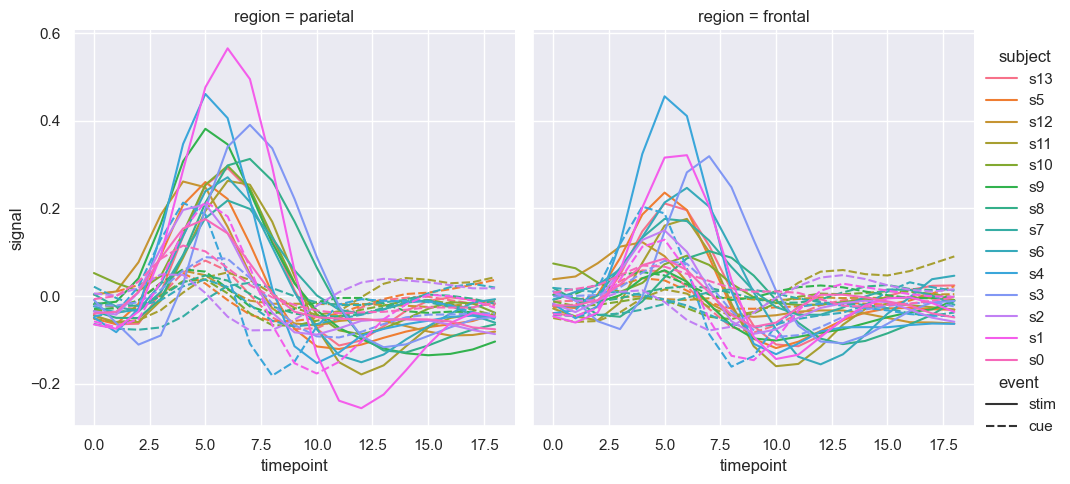

In [49]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="subject", style="event",
)

That worked, and an aficionado might be able to see what's going on. But the plot might be easier to interpret if we took the mean across subjects and just plot that (which was probably the whole point of running multiple subjects in this experiment).

Let's see what happens if we leave subject out of our aesthetic specification...

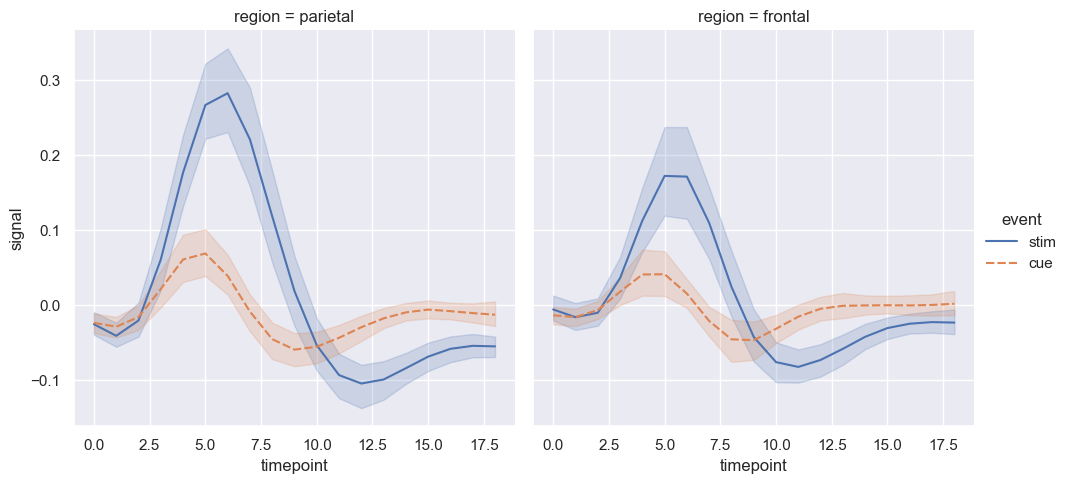

In [48]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

Nice! The `relplot()` function figured out that, if we didn't a given variable explicitly coded in our plot, then we probably wanted to average across it. 

And because seaborn was written by good scientists, `lineplot()` (which we called above via the `kind` argument) also included 95% CIs on the mean computed by bootstrapping.

---

In the above plot, it looks like the standard deviation of activation might be proportional to mean activation. We can check this quickly by just re-making the above plot, but having seaborn compute the standard deviation instead of the mean for us.

The doc page for `lineplot()` is [here](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot).

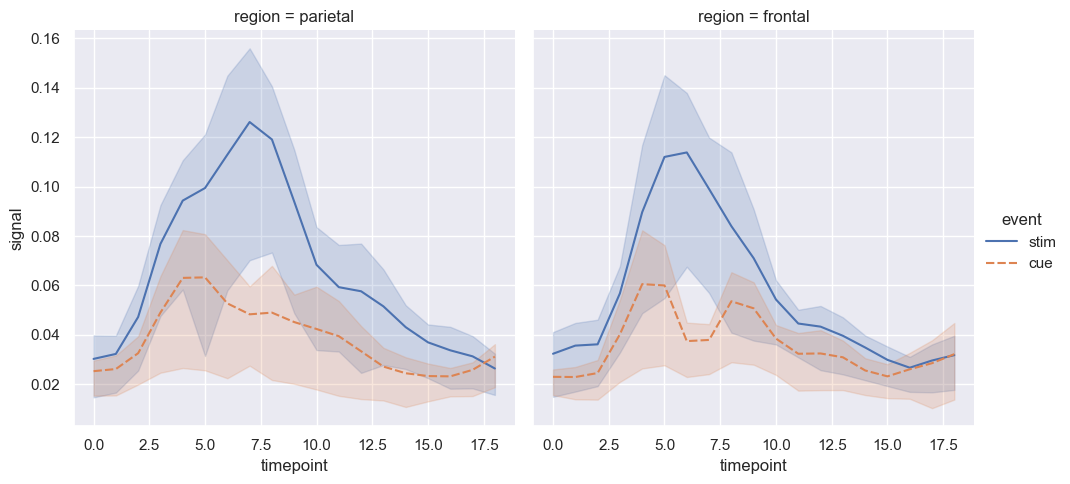

In [51]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
    estimator = 'std'
)

Sure enough!

### Distribution plots

Seaborn makes it very easy to plot data distributions. Here's one for our tipping data. The `kde` argument is going to add a 'kernel density estimate' (a best guess as to what the smooth version of the distribution looks like) for us.

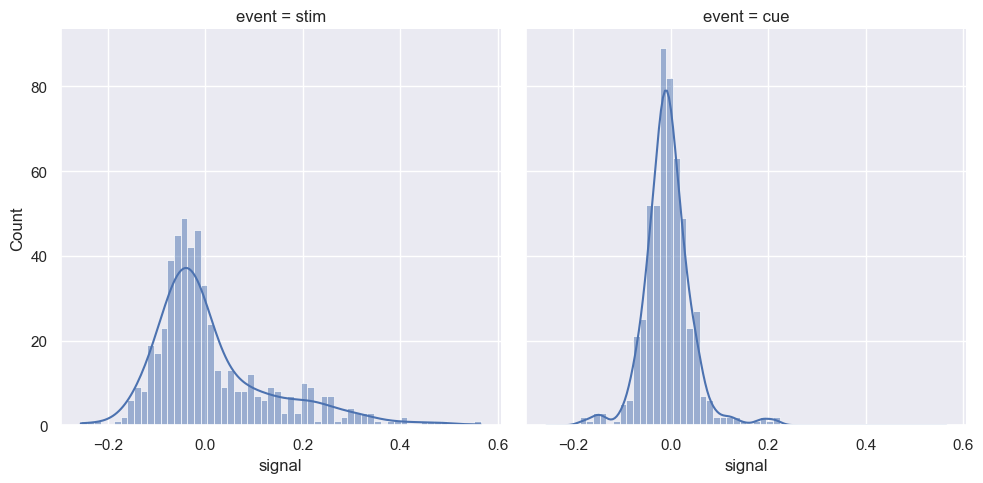

In [62]:
sns.displot(data=fmri, x="signal", col="event", kde=True)

That was easy but it's a little hard to compare these two distributions as is. Is overall activation higher for stimuli vs. cue? Or is overall activation the thing that matters?

---

Re-make the figure above so that visually comparing this distributions is easier. Hint: change the aesthetic property that 'time' maps to.

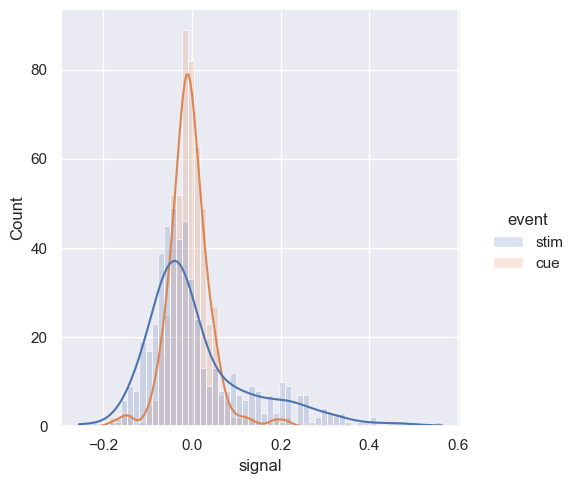

In [63]:
sns.displot(data=fmri, x="signal", hue="event", alpha = 0.2, kde=True)

---

### Categorical plots

Let's try playing with `catplot()`

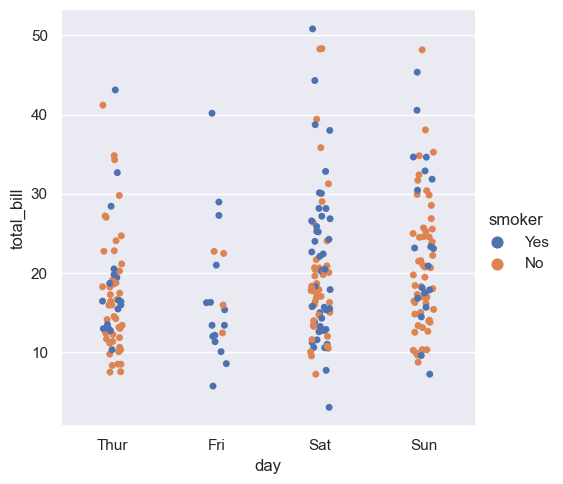

In [64]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker")

So a `stripplot` is the default axes-level plot (and notice that the default axes-level plots are the first ones listed under their corresponding figure-level counterparts. But we can have it call `boxplot()` for us by telling it that we want `kind="box"`.

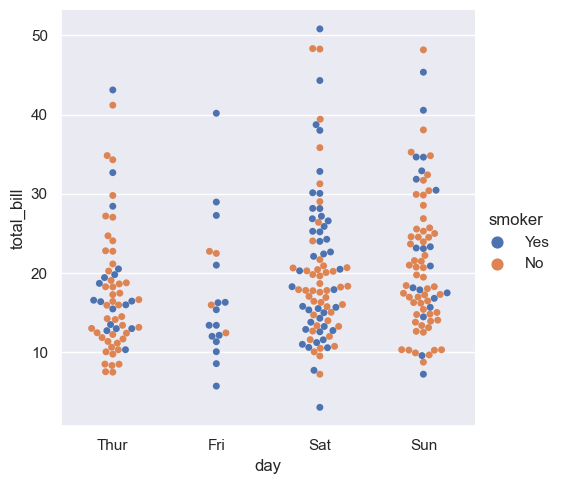

In [65]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

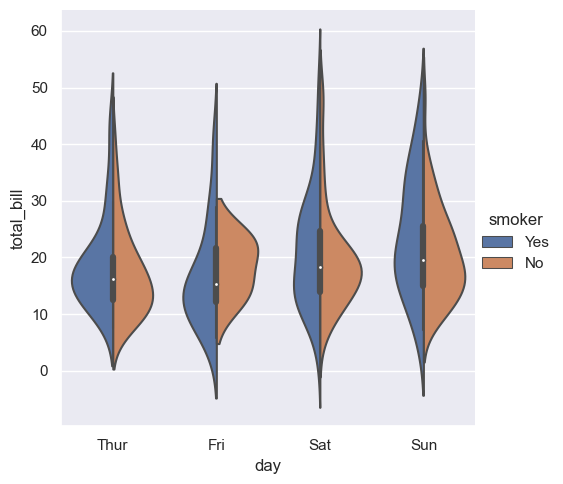

In [66]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

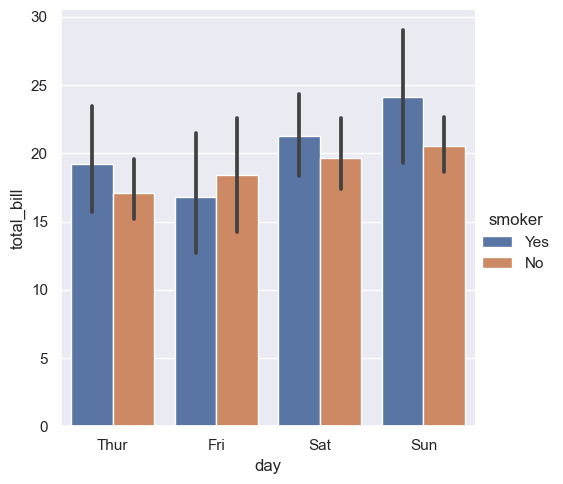

In [67]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

### Useful built in plots

Let's remake a plot similar to one we've made before.

First, we'll import numpy so we can make some data.

In [72]:
import numpy as np

Then make some data like we did before, but we'll convert to a pandas `DataFrame` at the end.

In [80]:
### make some data to play with
my_means = [0, 0]
my_cov = [[2, -1.9], [-1.9, 3]]
my_n = 5000

my_rng = np.random.default_rng(42)
x, y = my_rng.multivariate_normal(my_means, my_cov, my_n).T

df = pd.DataFrame(dict(x=x, y=y))

And then we'll call the seaborn function `jointplot()` to make a "joint distribution plot".

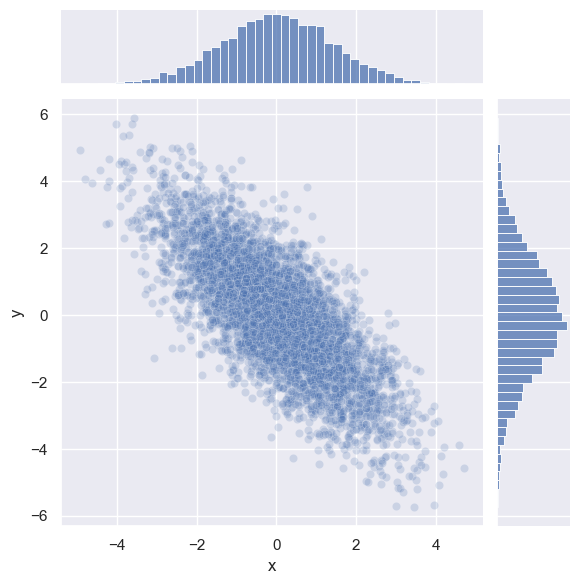

In [85]:
sns.jointplot(data=df, x='x', y='y', alpha = 0.2)

That was easy!

Too flex seaborn's muscles, though, let's load the built-in "penguins" data set.

In [83]:
penguins = sns.load_dataset("penguins")

In [84]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


So it looks like we have four measurements taken on penguins of different species, etc. Let's make a joint plot of some of these data.

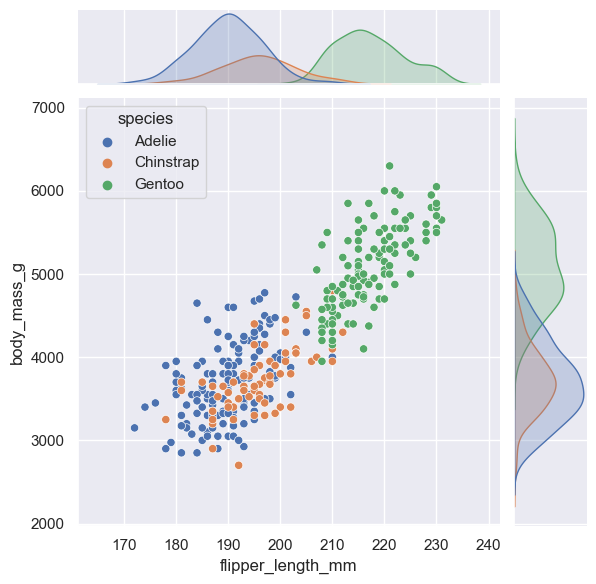

In [86]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species")

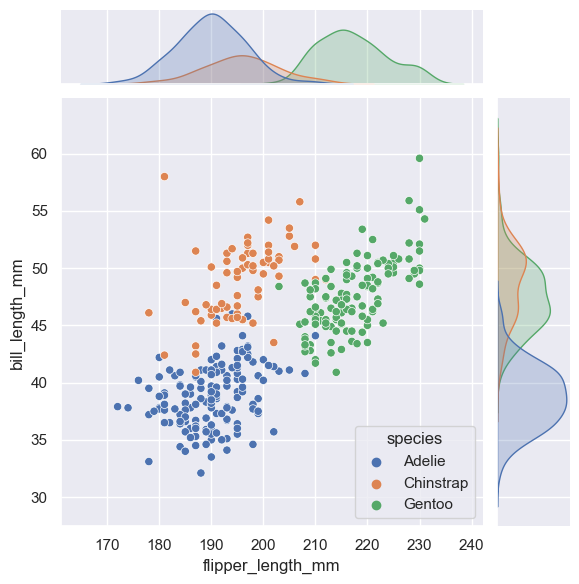

In [87]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

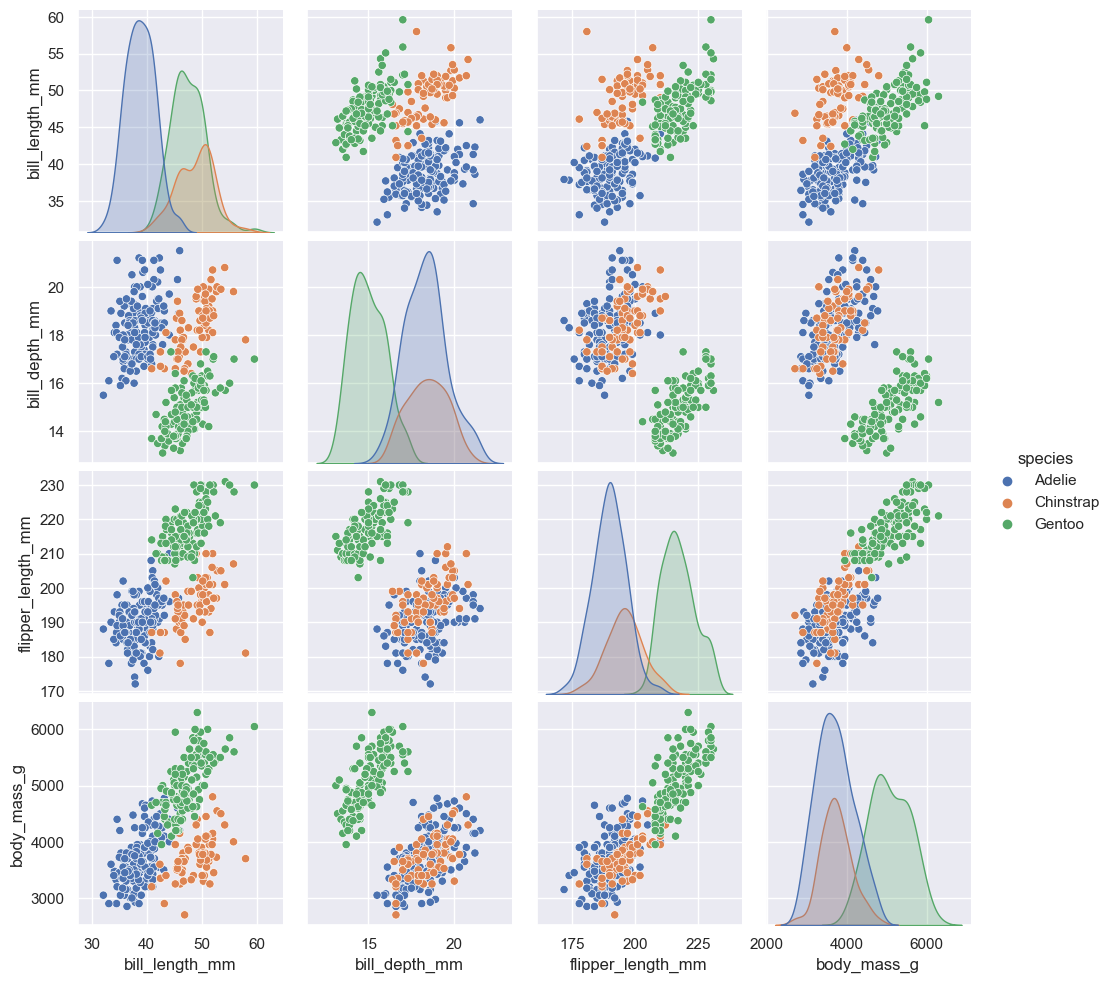

In [69]:
sns.pairplot(data=penguins, hue="species")

$\color{blue}{\text{Complete the following exercise.}}$

 - Use the cell below to report one parameters that can be passed to `sns`. Explain what the parameter does using your own words.

 - Use the cell below to show an example application of the paramter use described above. Use `data` to shwo the example (Please, pick a parameter that is not the one used in the next example!):

---

---

---

### Axis level plots

Notice that we've assigned the output of `sns.boxplot()` to `ax`. So we have an `axes` object (named `ax`), and thus have access to all the things an `axes` knows how to do. So if we type "ax." and a tab, we'll see something like this:
    
---
    
![seaborn_overview](./assets/jpnb20/axesMethods.png)
    
---

So let's do that:

In [8]:
ax.

SyntaxError: invalid syntax (1102313331.py, line 1)

and now we can scroll around to find useful things. 

Let's try inverting the y axis so that faster times plot visually higher!

And we can see a lot of useful stuff by typing `ax.set` and a tab. Among those is `ax.set_title` which we can use to... wait for it... add a title!

### Summary
So `seaborn` is a nice way to make plots of data from `pandas` data frames. Its default values make good looking plots. It has two main kinds of plotting functions:

* figure level functions that are handy for making multi axes panel figures
* axes level functions that return an axes object handle to you, allowing for fine control over the plot's appearance



---

$\color{blue}{\text{Complete the following exercise.}}$

Write your function here:

Now get help on it:

And show that it works with an example call and a plot!